# A. An overview of the dataset
## 1) Import DF

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('darkgrid')

df = pd.read_pickle('data_385k.pkl', compression='zip')

In [2]:
# Importing this using this comment https://stackoverflow.com/a/69248878
# I wanted table in markdown below to be aligned left
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

## 2) Initial DF size

In [3]:
df.shape

(385384, 99)

In [4]:
initial_rows_count = df.shape[0]
initial_columns_count = df.shape[1]

## 3) Sample DF

In [5]:
df.sample(5)

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
143918,0.0,0075450126457,0.0,mg,73.33,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,0.0,mg,NaN,NaN,NaN,NaN
114752,0.0,0688267133510,714.0,mg,67.86,NaN,g,0.0,mg,NaN,...,NaN,NaN,1.43,mg,0.0,mg,286.0,IU,NaN,NaN
169223,0.0,0034700422176,31.0,mg,22.48,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,0.9,mg,NaN,NaN,NaN,NaN
293181,0.0,0722252610812,59.0,mg,66.18,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,1.8,mg,NaN,NaN,NaN,NaN
324334,0.0,20731144,56.0,mg,36.11,NaN,g,0.0,mg,NaN,...,NaN,NaN,NaN,NaN,10.0,mg,NaN,NaN,NaN,NaN


## 4) Data type per column

In [6]:
pd.value_counts(df.dtypes)

float64    50
object     48
int64       1
dtype: int64

In [7]:
columns_int64 = list(df.select_dtypes(include=['int64']).columns)
columns_int64

['id']

In [8]:
columns_float64 = list(df.select_dtypes(include=['float64']).columns)
columns_float64

['alcohol_by_volume',
 'calcium_per_hundred',
 'carbohydrates_per_hundred',
 'carbohydrates_per_portion',
 'cholesterol_per_hundred',
 'copper_cu_per_hundred',
 'energy_kcal_per_hundred',
 'energy_kcal_per_portion',
 'energy_per_hundred',
 'energy_per_portion',
 'fat_per_hundred',
 'fat_per_portion',
 'fatty_acids_total_saturated_per_hundred',
 'fatty_acids_total_trans_per_hundred',
 'fiber_insoluble_per_hundred',
 'fiber_per_hundred',
 'fiber_per_portion',
 'fiber_soluble_per_hundred',
 'folate_total_per_hundred',
 'folic_acid_per_hundred',
 'iron_per_hundred',
 'magnesium_per_hundred',
 'manganese_mn_per_hundred',
 'monounsaturated_fatty_acids_per_hundred',
 'phosphorus_per_hundred',
 'polyunsaturated_fatty_acids_per_hundred',
 'portion_quantity',
 'potassium_k_per_hundred',
 'protein_per_hundred',
 'protein_per_portion',
 'quantity',
 'salt_per_hundred',
 'salt_per_portion',
 'saturated_fat_per_hundred',
 'saturated_fat_per_portion',
 'sodium_per_hundred',
 'sodium_per_portion',
 's

In [9]:
columns_object = list(df.select_dtypes(include=['object']).columns)
columns_object

['barcode',
 'calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'copper_cu_unit',
 'country',
 'created_at',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_insoluble_unit',
 'fiber_soluble_unit',
 'fiber_unit',
 'folate_total_unit',
 'folic_acid_unit',
 'hundred_unit',
 'ingredients_en',
 'iron_unit',
 'magnesium_unit',
 'manganese_mn_unit',
 'monounsaturated_fatty_acids_unit',
 'phosphorus_unit',
 'polyunsaturated_fatty_acids_unit',
 'portion_unit',
 'potassium_k_unit',
 'product_name_de',
 'product_name_en',
 'product_name_fr',
 'protein_unit',
 'salt_unit',
 'saturated_fat_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'unit',
 'updated_at',
 'vitamin_a_iu_unit',
 'vitamin_b12_cobalamin_unit',
 'vitamin_b1_thiamin_unit',
 'vitamin_b2_riboflavin_unit',
 'vitamin_b3_niacin_unit',
 'vitamin_b5_panthothenic_acid_unit',
 'vitamin_b6_pyridoxin_unit',
 'vitamin_c_ascorbic_acid_unit',
 

In [11]:
# Converting date fields to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# B. Preliminary Exploratory Data Analysis
## 1) Duplicated products

In [12]:
# Use the duplicated method to find duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows.sort_values(by='product_name_en').loc[:,('product_name_en','id')].head(10)

,product_name_en,id
381337,"Brown rice, pumpkin & ginger noodle",376928
376297,"Brown rice, pumpkin & ginger noodle",376928
377725,"Brown rice, pumpkin & ginger noodle",376928
383941,"Brown rice, pumpkin & ginger noodle",376928
378901,"Brown rice, pumpkin & ginger noodle",376928
376381,"Brown rice, pumpkin & ginger noodle",376928
383857,"Brown rice, pumpkin & ginger noodle",376928
381421,"Brown rice, pumpkin & ginger noodle",376928
378817,"Brown rice, pumpkin & ginger noodle",376928
384025,"Brown rice, pumpkin & ginger noodle",376928


These are definitively duplicates, we are going to remove them

In [13]:
df.duplicated().sum()

10500

In [14]:
df.drop_duplicates(inplace=True)
df.shape

(374884, 99)

385'384 - 10'500 = 374'884, we did not remove any column, only duplicate valuess when entire rows were duplicated.

## 2) Proportion of missing values

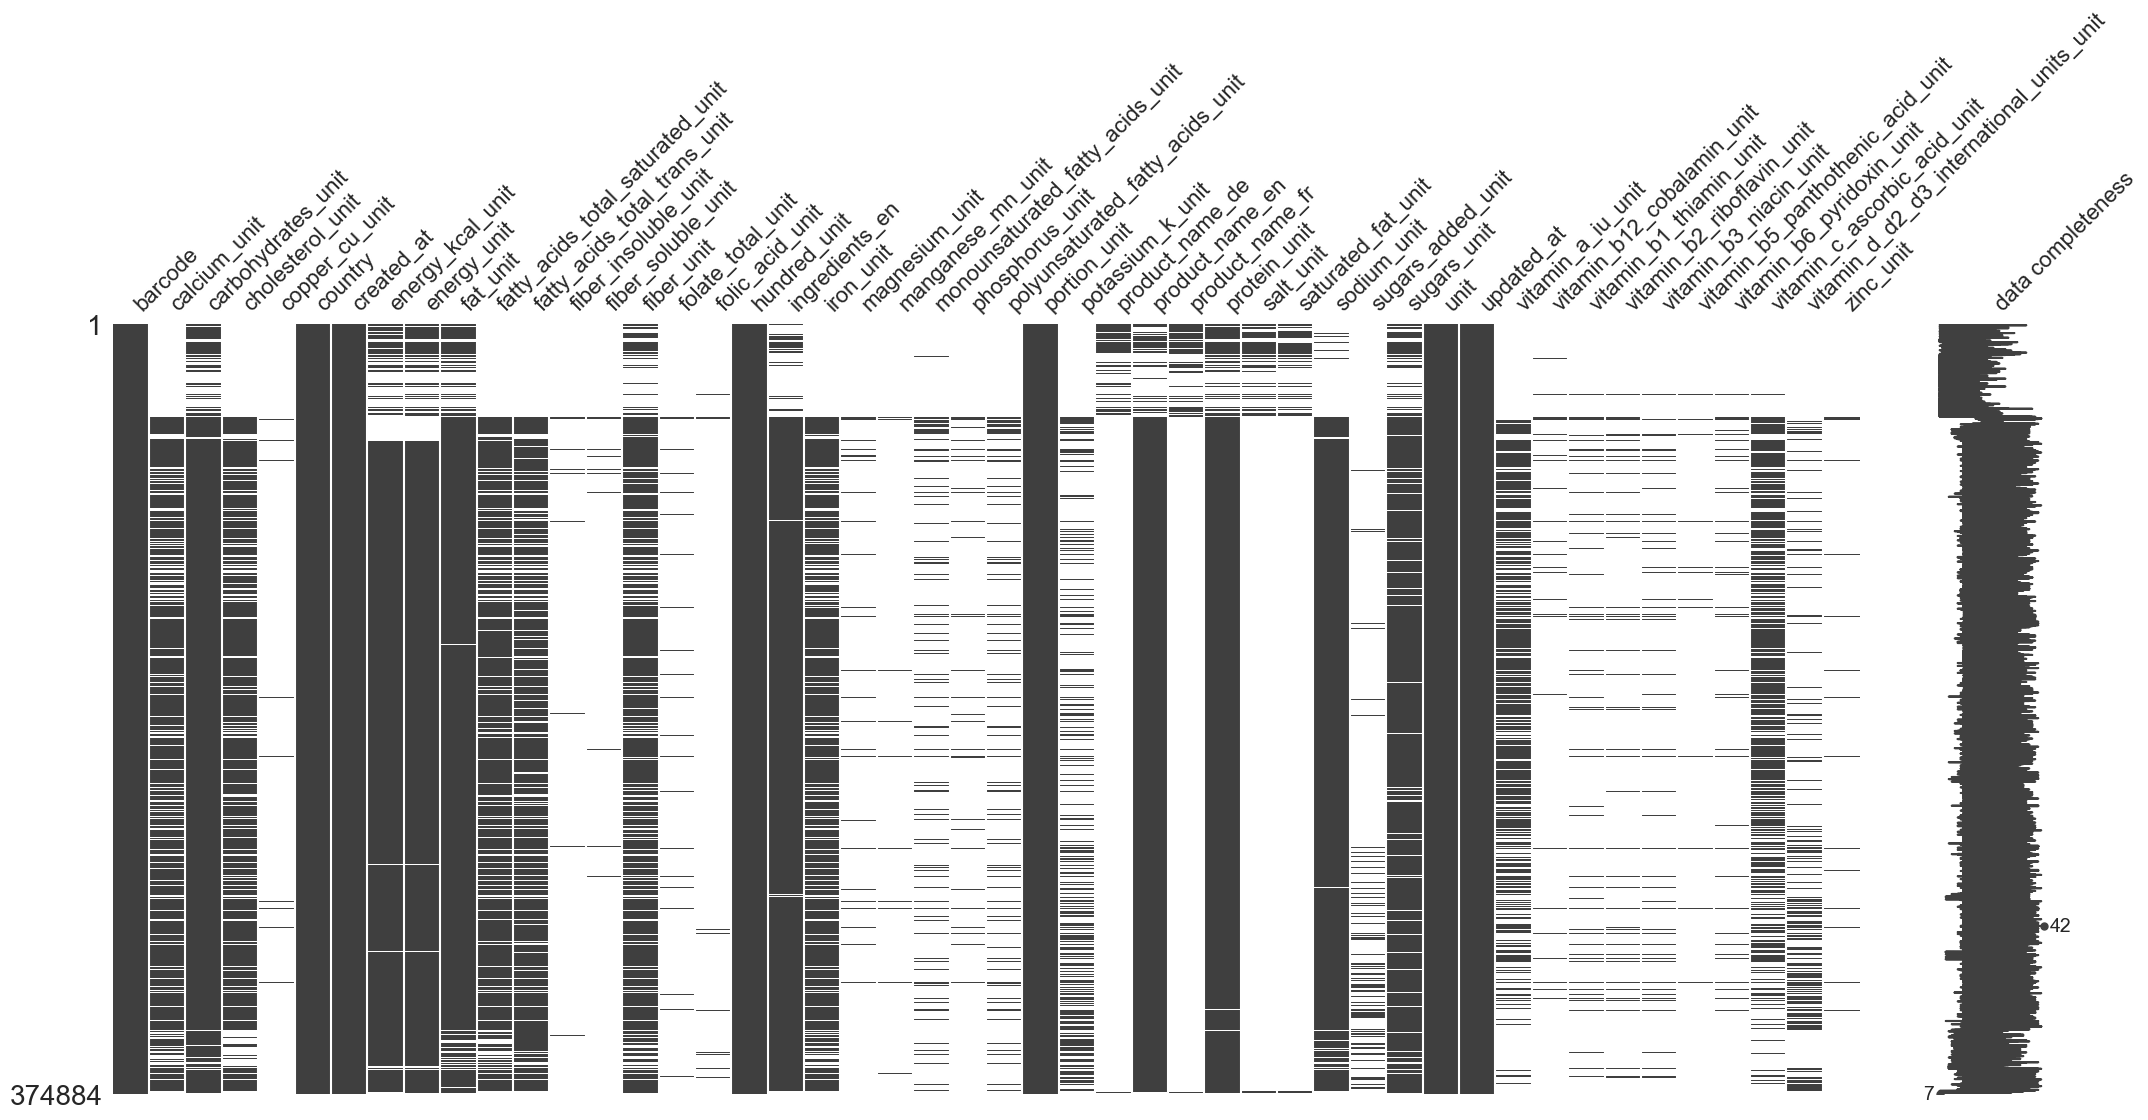

In [15]:
import missingno as msno
# Inspecting non-numerical feature first for readability 
msno.matrix(df.select_dtypes(exclude='number'), labels=True);

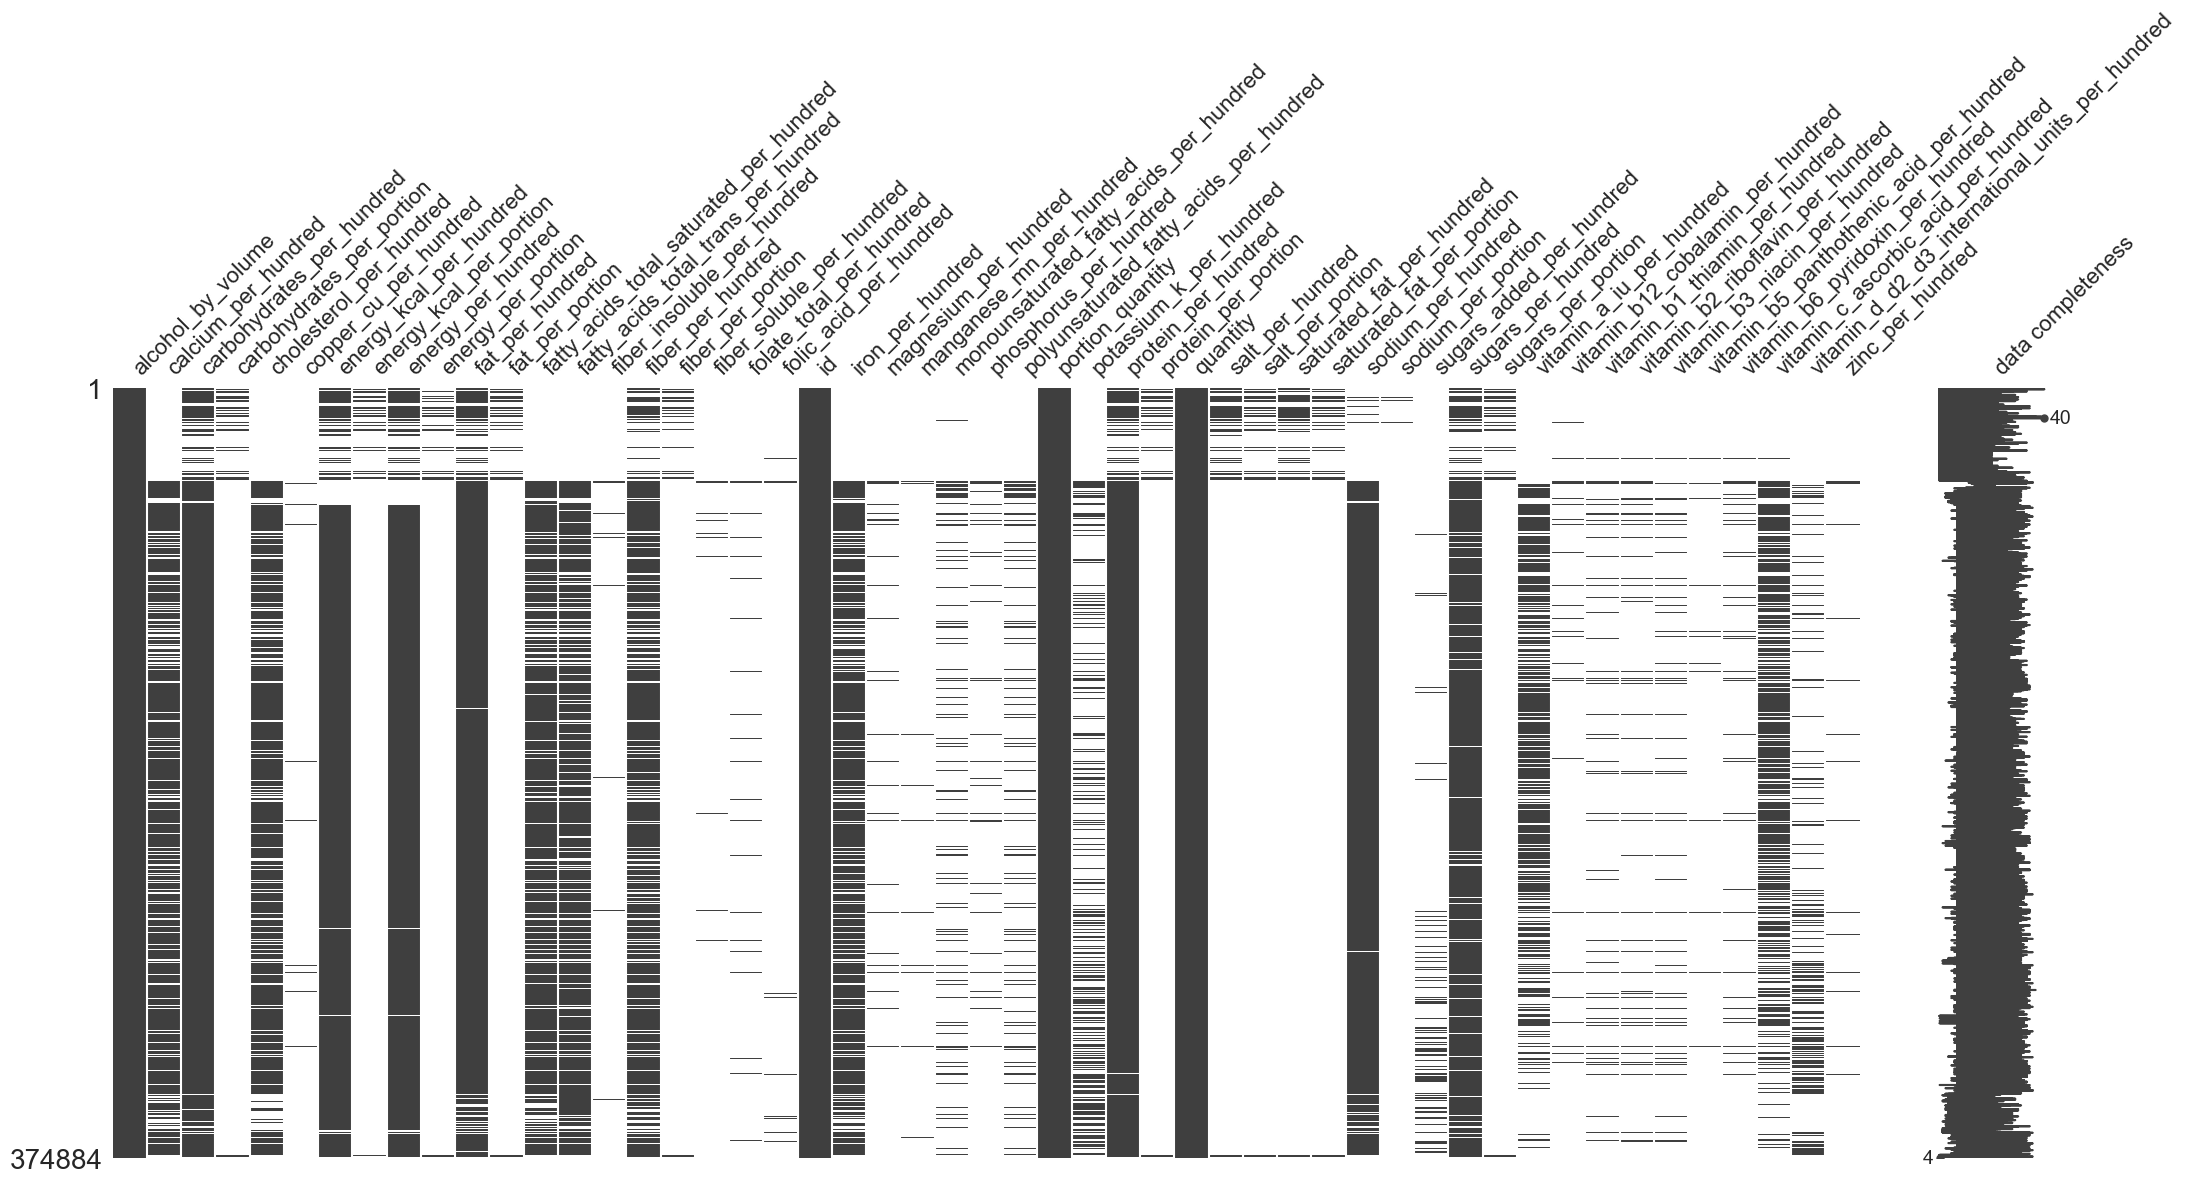

In [16]:
# Remaining numerical features
msno.matrix(df.select_dtypes(include='number'), labels=True);

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374884 entries, 0 to 374883
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype              
---  ------                                           --------------   -----              
 0   alcohol_by_volume                                374884 non-null  float64            
 1   barcode                                          374884 non-null  object             
 2   calcium_per_hundred                              264854 non-null  float64            
 3   calcium_unit                                     264961 non-null  object             
 4   carbohydrates_per_hundred                        348551 non-null  float64            
 5   carbohydrates_per_portion                        10355 non-null   float64            
 6   carbohydrates_unit                               348828 non-null  object             
 7   cholesterol_per_hundred                          270282 non-null 

- There are visibly around 20-30 numerical (fiber_soluble_per_hundred) and non numerical (fiber_soluble_unit) features missing a lot of records.
Let's illustrate with a red bar on a bar plot

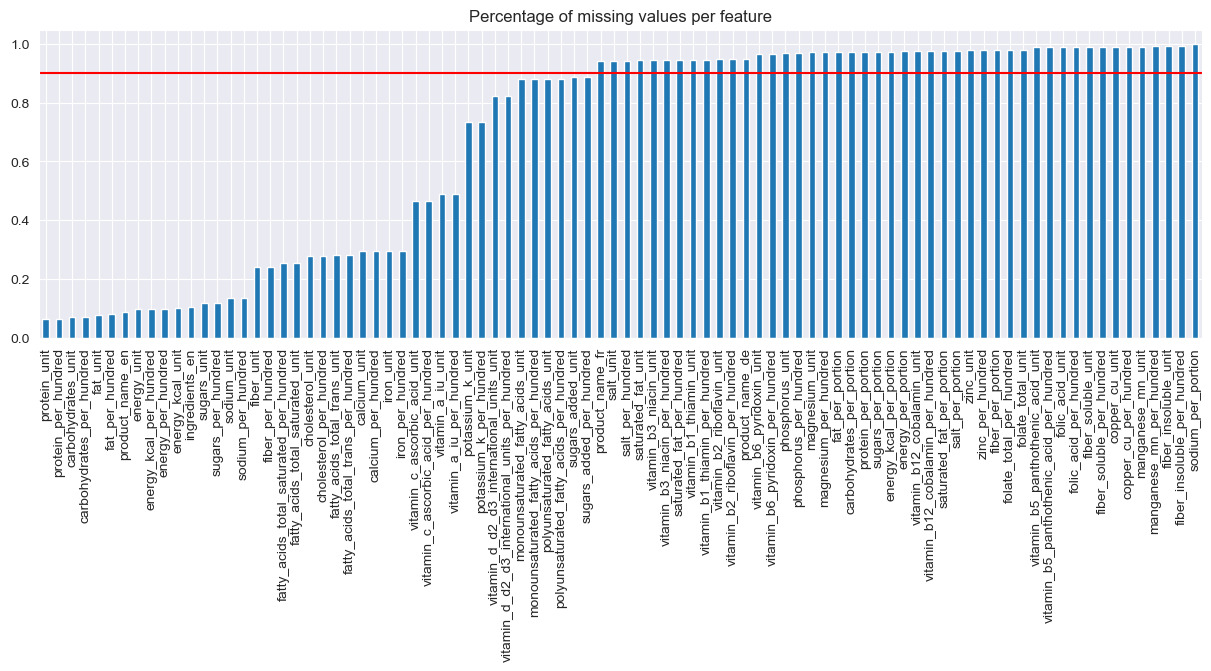

In [18]:
# Defining an arbitrary threshold for the percentage of missing values to remove
data_completeness_threshold = 0.9
df_missing_values_count = df.isna().mean().sort_values()
df_missing_value = df_missing_values_count[df_missing_values_count>0]
df_missing_value.plot(
    kind='bar', figsize=(15, 4), title='Percentage of missing values per feature')
plt.axhline(data_completeness_threshold, color='r') 
plt.show()

# 3) Address missing values

### Decision 1 
Following 2), we are going to drop columns where treshold for data completeness is not met

In [19]:
# Calcate threshold numerical value based on number of rows
threshold = df.shape[0] * (1 - data_completeness_threshold)
df.dropna(thresh=threshold, axis=1, inplace=True)

### Observation 2
We are going to investigate usefullness of features related to "portion"

In [20]:
only_portion_filled = (df['portion_quantity']>0) & (df['quantity']==0)
df[only_portion_filled]['id'].count()

1385

In [21]:
df[df['quantity']>0]['id'].count()

357793

### Decision 2 
We will drop all portion columns are there is only 1385 records where portion quantity is filled and not quantity (versus 357'793 records for quantity)

In [22]:
portion_columns = [column for column in df.columns if 'portion' in column]
portion_columns

['portion_quantity', 'portion_unit']

In [23]:
df.drop(portion_columns, axis=1, inplace=True)

### Observation 3 
Contextual elements from dataset nature 

- Looking at a few submissions, we can see this database is essentially manually filled by users looking at packaging of food products 
[example 1](https://www.foodrepo.org/en/products/375496) [example 2](https://www.foodrepo.org/en/products/380176) [example 3](https://www.foodrepo.org/en/products/376702)
we can see that submissions are not exhaustive with weight often missing, and NUTRITIONAL VALUES from packaging not being always fully informed

- Pieces of information that are on nutritional values but not filled in database, we are going to encounter problem of taking statisical approaches to infer missing data. there is no category within dataframe (could be sorting food products between candies, meat, ...) and we can't really average nutritional values of a food product and expect this to be significative.

We will treat first case of nutritional values seen on packaging table. As we can't take averages here, we will drop rows if a value is missing.

First we will look at whether some nutrional values are country specific

In [24]:
nutritional_values = ['country',
                      'energy_kcal_per_hundred',
                      'energy_per_hundred',
                      'carbohydrates_per_hundred',
                      'fat_per_hundred',
                      'fatty_acids_total_saturated_per_hundred',
                      'fiber_per_hundred',
                      'protein_per_hundred',
                      'sodium_per_hundred',
                      'sugars_per_hundred',                      
                     ]

df[nutritional_values].groupby('country').count()

,energy_kcal_per_hundred,energy_per_hundred,carbohydrates_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fiber_per_hundred,protein_per_hundred,sodium_per_hundred,sugars_per_hundred
country,,,,,,,,,
AT,1,1,0,0,0,0,0,0,0
CH,22549,22545,22330,22297,0,14529,22183,1069,20416
DE,988,989,985,980,0,363,977,3,988
FR,54,54,53,52,0,30,53,0,49
IT,278,277,269,267,0,180,268,0,270
UK,1,1,1,1,0,1,1,0,1
US,314703,314704,324913,321663,279151,269376,327007,322752,308430


- We will exclude arbitrarily nutrional values that are at 0 for some countries
    * sugars_per_hundred (only 308 K remaining records)
    * fatty_acids_total_saturated_per_hundred (only in US)
    * fiber_per_hundred (only 269 K remaining records)
    * sodium_per_hundred (FR / IT / UK)
    
as there completion rate is lower than other nutrional values and we want to run dropna with how='any' (in order to get products where we have all entries on nutrional values completed)

### Decision 3
We remove missing rows where top nutritional values are not filled, while trying to keep as much data as possible

In [25]:
# Keeping only top categories as seen on examples pictures
nutritional_values = ['energy_kcal_per_hundred',
                      'energy_per_hundred',
                      'carbohydrates_per_hundred',
                      'fat_per_hundred',
                      'protein_per_hundred',                   
                     ]

# Dropping rows where nutrional values are missing
df.dropna(inplace=True,
          subset = nutritional_values,
          how ='any'
         )

### Decision 4 
Missing product_name_en and ingredients_en can straightforwardly be replaced by 'missing_productname' and 'missing_ingredients'

In [26]:
# Replacing NaN product names and ingredients
# Fill up missing values in non-numerical columns
df['product_name_en'].fillna('missing_productname', inplace=True)
df['ingredients_en'].fillna('missing_ingredients', inplace=True)

### Observation 5
Missing creation dates are forward-filled as they are organised ascendingly. Not use same logic on updated_at as it is possible for a product not to be updated.

In [27]:
# Checking whether created_at column is ordered ascendingly
df['created_at'].notnull().is_monotonic_increasing

True

### Decision 5
Replacing missing dates using fill_na forward fill method 

In [28]:
df['created_at']= df['created_at'].fillna(method='ffill')

### Observation 6
We saw while plotting number of unique values per feature that some feature already have 1 unique value

In [29]:
unique_objects  = df.select_dtypes(exclude='number').nunique()
# For iteration, columns that contain one unique value
one_value_columns = list(unique_objects[unique_objects==1].index)
one_value_columns

['calcium_unit',
 'carbohydrates_unit',
 'cholesterol_unit',
 'energy_kcal_unit',
 'energy_unit',
 'fat_unit',
 'fatty_acids_total_saturated_unit',
 'fatty_acids_total_trans_unit',
 'fiber_unit',
 'iron_unit',
 'monounsaturated_fatty_acids_unit',
 'polyunsaturated_fatty_acids_unit',
 'potassium_k_unit',
 'protein_unit',
 'sodium_unit',
 'sugars_added_unit',
 'sugars_unit',
 'vitamin_a_iu_unit',
 'vitamin_c_ascorbic_acid_unit',
 'vitamin_d_d2_d3_international_units_unit']

### Decision 6
Populate non numerical columns with unique value with unique value.

In [30]:
# Replace NaN with unique value in column
for column in one_value_columns:
    correct_value = df[column].dropna().unique()[0]
    df[column].fillna(correct_value, inplace=True)    

### Observation 7 
Listing number of values in remaining non numerical columns. Inspect specifically columns with limited amount of values

In [31]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()
unique_values[unique_values>1]

hundred_unit            2
country                 6
unit                    6
created_at          23341
updated_at          23363
product_name_en    203584
ingredients_en     232367
barcode            329829
dtype: int64

We will have a closer look at units as we use these afterwards

In [32]:
# Select columns that display units
unit_columns = [column for column in df.columns if column.endswith('_unit') or column=='unit']
# Applies unique function to each column and then transposes so that it is easier to read
df[unit_columns].apply(pd.Series.unique)

calcium_unit                                                  [mg]
carbohydrates_unit                                             [g]
cholesterol_unit                                              [mg]
energy_kcal_unit                                            [kCal]
energy_unit                                                   [kJ]
fat_unit                                                       [g]
fatty_acids_total_saturated_unit                               [g]
fatty_acids_total_trans_unit                                   [g]
fiber_unit                                                     [g]
hundred_unit                                               [g, ml]
iron_unit                                                     [mg]
monounsaturated_fatty_acids_unit                               [g]
polyunsaturated_fatty_acids_unit                               [g]
potassium_k_unit                                              [mg]
protein_unit                                                  

### Decision 7
We can't replace values for unit as easily - error risk is great if we mix grams with liters - so we will have to delete records altogether

In [33]:
# Dropping rows where nutrional values are missing
df.dropna(inplace=True,
          subset = ['unit']
         )

### Remaining missing values

In [34]:
df_missing_values = df.isna().sum().sort_values(ascending=False)
# Display only columns with missing values
df_missing_values[df_missing_values>0]

polyunsaturated_fatty_acids_per_hundred            291122
monounsaturated_fatty_acids_per_hundred            290836
sugars_added_per_hundred                           289796
vitamin_d_d2_d3_international_units_per_hundred    267781
potassium_k_per_hundred                            241429
vitamin_a_iu_per_hundred                           145759
vitamin_c_ascorbic_acid_per_hundred                139886
calcium_per_hundred                                 78746
iron_per_hundred                                    78690
fatty_acids_total_trans_per_hundred                 76099
cholesterol_per_hundred                             71891
fatty_acids_total_saturated_per_hundred             64565
fiber_per_hundred                                   59876
sodium_per_hundred                                  23890
sugars_per_hundred                                  19926
dtype: int64

Information such as vitamin d or potassium are not present on all packagings and not part of nutrional values table.
We will keep this NaN values at the moment, as it is not on main nutrional values columns. 

In [35]:
print('Dataset shape after cleaning:', df.shape,
      '\n kept', '{:.0%}'.format(df.shape[0] / initial_rows_count),'of rows and',
       '{:.0%}'.format(df.shape[1] / initial_columns_count),'of columns'
     )

Dataset shape after cleaning: (329935, 51) 
 kept 86% of rows and 52% of columns


We are losing data but we treated missing values in order to have as much data as possible on main nutrional values (carbs, protein, ..).

## 4) Categorical variables

First, lets show number of unique values in categorical features

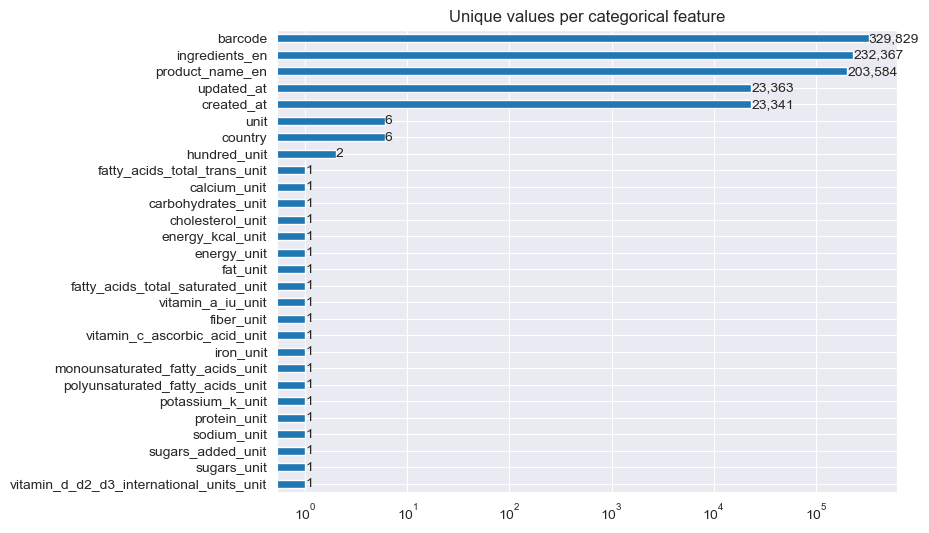

In [36]:
unique_categorical_values = df.select_dtypes(exclude="number").nunique().sort_values()
unique_categorical_values.plot.barh(logx=True, figsize=(8, 6), title='Unique values per categorical feature')
ax = plt.gca()

# Loop through each bar and add the label
for bar in ax.patches:
    # Calculate the label value
    label_value = int(bar.get_width())
    # Calculate the label position
    label_position_x = bar.get_width()
    label_position_y = bar.get_y() + bar.get_height() / 2.
    # Add the label
    ax.text(label_position_x, label_position_y, '{:,}'.format(label_value), 
            fontsize=10, ha='left', va='center')

plt.show()

We can see most units features have few values when created_at and updated_at are vastly similar, indicating perhaps that a very small amount of products have been updated (and created_at == updated_at)
We can also see products will be missing product names and ingredients

In [37]:
df.loc[(df['created_at'] == df['updated_at']) &
       (df['created_at'].notnull()) &
       (df['updated_at'].notnull()), :].shape[0]

306901

We can see that in the vast majority of cases updated_at equals created_at, indicating that will probably not use updated_at

### Distribution of country and unit

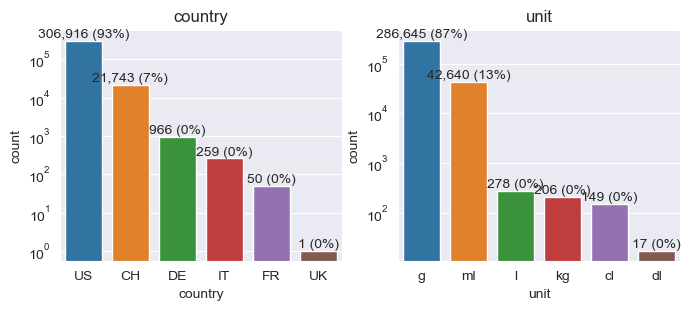

In [38]:
# Segment only to country and unit columns
columns = ['country', 'unit']

plt.figure(figsize=(8,3))

for i, column in enumerate(columns):    
    # Create a subplot in a grid with 1 row and 2 columns
    plt.subplot(1, 2, i+1)
    ax = sns.countplot(x=column, 
                       data=df,
                       order=df[column].value_counts(ascending=False).index)
    
    # Create lists to add data labels in absolute value and proportion of total
    # Adaptation from this https://stackoverflow.com/a/69813924
    values = df[column].value_counts(ascending=False).values
    proportions = df[column].value_counts(ascending=False, normalize=True).values * 100
    labels = [f'{p[0]:,} ({p[1]:.0f}%)' for p in zip(values, proportions)]
    ax.bar_label(container=ax.containers[0], labels=labels)
    
    plt.title(column)    
    # Introduce log scale as there is a huge disparity between values 
    plt.yscale('log')

plt.show()

Most values are coming from US 307k records and CH 22k records
Most values are either expressed in grams or milliliters

## 5) Descriptive statistics and plots of numerical features

We remove column ID as this is an identifier column

In [39]:
# Select all numerical columns except 'id'
df_numeric = df.select_dtypes(include=['number']).drop(columns=['id'])

We will use describe as this using integer for readability

In [40]:
df_numeric.describe().astype(int)

,alcohol_by_volume,calcium_per_hundred,carbohydrates_per_hundred,cholesterol_per_hundred,energy_kcal_per_hundred,energy_per_hundred,fat_per_hundred,fatty_acids_total_saturated_per_hundred,fatty_acids_total_trans_per_hundred,fiber_per_hundred,...,polyunsaturated_fatty_acids_per_hundred,potassium_k_per_hundred,protein_per_hundred,quantity,sodium_per_hundred,sugars_added_per_hundred,sugars_per_hundred,vitamin_a_iu_per_hundred,vitamin_c_ascorbic_acid_per_hundred,vitamin_d_d2_d3_international_units_per_hundred
count,329935,251189,329935,258044,329935,329935,329935,265370,253836,270059,...,38813,88506,329935,329935,306045,40139,310009,184176,190049,62154
mean,0,112,33,52,274,1146,12,4,0,2,...,5,507,7,95,0,23,16,501,14,14
std,0,2301,39,1658,257,1075,18,8,1,5,...,9,10273,14,420,20,23,30,2476,351,75
min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25%,0,0,6,0,93,389,0,0,0,0,...,0,85,0,28,0,5,1,0,0,0
50%,0,36,23,0,270,1129,5,2,0,1,...,2,170,4,46,0,15,6,0,0,0
75%,0,104,59,25,400,1673,20,7,0,3,...,6,304,10,120,0,35,25,354,4,0
max,44,684000,6400,250000,39600,165686,1900,1000,615,1730,...,100,925000,5747,230000,5952,1040,5800,333333,71428,5000


Max for a lot of values is very far from mean (example calcium). Meaning histogram won't always provide a meaningful representation as range of values will be too wide for bins to provide readability. I have arbitrarily chosen threshold for which i switch chart type from histogram to subplot as it is a more suitable representation when presented with a wide range of values (for numerical features)

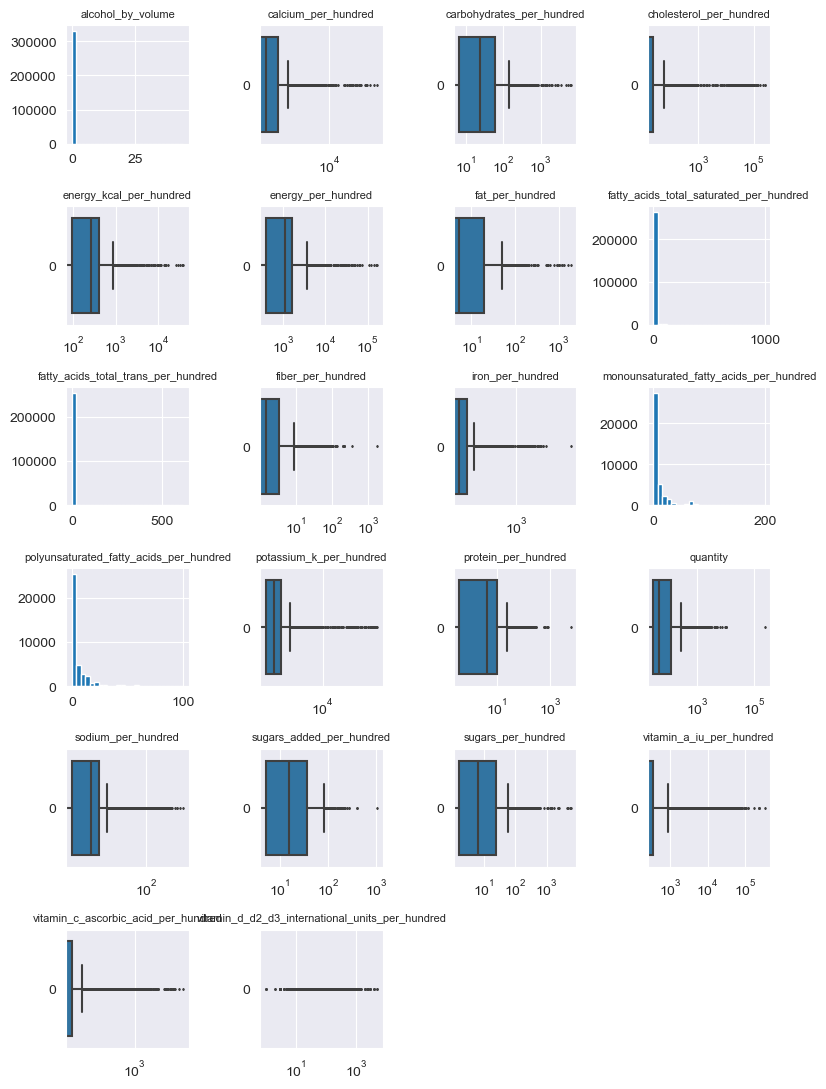

In [41]:
# Number of subplots in columns
TOTAL_WIDTH = 4

# If x_axis reaches this values, convert histogram to a boxplot
BOXPLOT_THRESHOLD = 1000
num_plots = len(df_numeric.columns)
num_rows = math.ceil(num_plots / TOTAL_WIDTH)
figure_height = df_numeric.shape[1] / TOTAL_WIDTH * 2

fig, axes = plt.subplots(nrows=num_rows , ncols=TOTAL_WIDTH, figsize=(TOTAL_WIDTH * 2, figure_height))
axes = axes.flatten()

for i, column in enumerate(df_numeric.columns):
  
        # Use boxplots for columns with wide range of values as histograms won't represent data properly
        if df[column].max() > BOXPLOT_THRESHOLD:
            sns.boxplot(data=df[column], orient='h', ax=axes[i], fliersize=1)
            axes[i].set_xscale('log')
        else:
            axes[i].hist(df[column], bins=25)         
        
        # Set the title of the subplot, small labels for readability
        axes[i].set_title(label=column,fontdict={'fontsize': 8})

plt.tight_layout()

for ax in axes.flatten():
    if not ax.has_data():
        ax.remove()
plt.show()

We see quite clearly on main nutritional values the need for addressing error values, for instance on fat_per_hundred which is indicated on packaging in gram per hundred and represented here as a box plot, meaning maximum value is above 1000.

# 6) a) Unrealistic values

The range of acceptable values in each columns, using scientific notation.

| Unit       | Range of values           |
|----------|---------------------------|
| g          | [0, 100]                  |
| mg         | [0, 1e5]                  |
| µg         | [0, 1e8]                  |
| kJ         | [0, 3700]                 |
| 1 IU Vitamin A | [0, 3.3e8]            |
| 1 IU Vitamin D | [0, 4e9]              |


We use list comprehension to create a list of per_hundred columns we need to address with their asssociated unit. We will loop through per hundred columns and check for associated unit if value is in acceptable range described in table above

In [42]:
# Create list with columns ending with _per_hundred, and then created associated list of unit columns in 
per_hundred_columns = [column for column in df.columns if column.endswith('_per_hundred')]
associated_unit = [column.replace('per_hundred', 'unit') for column in per_hundred_columns]

In [43]:
# Create a dictionary with the min and max values for each unit
# translating kCal, to convert from kJ to calories, divide kJ by 4.18. so range is max 3700/4.18, that we average 886
unit_range = {
    'g': [0, 100],
    'mg': [0, 100000],
    'µg': [0, 100000000],
    'kJ': [0, 3700],
    'kCal': [0, 886],
    'vitamin_a_iu': [0, 330000000],
    'vitamin_d_d2_d3_international': [0, 4000000000]
}

# Loop through each value in the associated_unit[i] column
for i, column in enumerate(per_hundred_columns):
    for unit in df[associated_unit[i]].unique():        
        # Check whether the unit is present in the dictionary
        if unit in unit_range:            
            min_value, max_value = unit_range[unit]
        else:
            # Create a special case for columns vitamin A and D
            if 'vitamin_a_iu' in column:
                min_value, max_value = unit_range['vitamin_a_iu']
            elif 'vitamin_d_d2_d3_international' in column:
                min_value, max_value = unit_range['vitamin_d_d2_d3_international']
            else:
                # Do nothing if the unit is not present in the dictionary
                pass
        
        # Create boolean series that select rows that are not 
        unacceptable_values = (df[associated_unit[i]] == unit) & ((df[column] < min_value) | (df[column] > max_value))
        df = df[~unacceptable_values]

# 6) a) Re-do the descriptive statistics

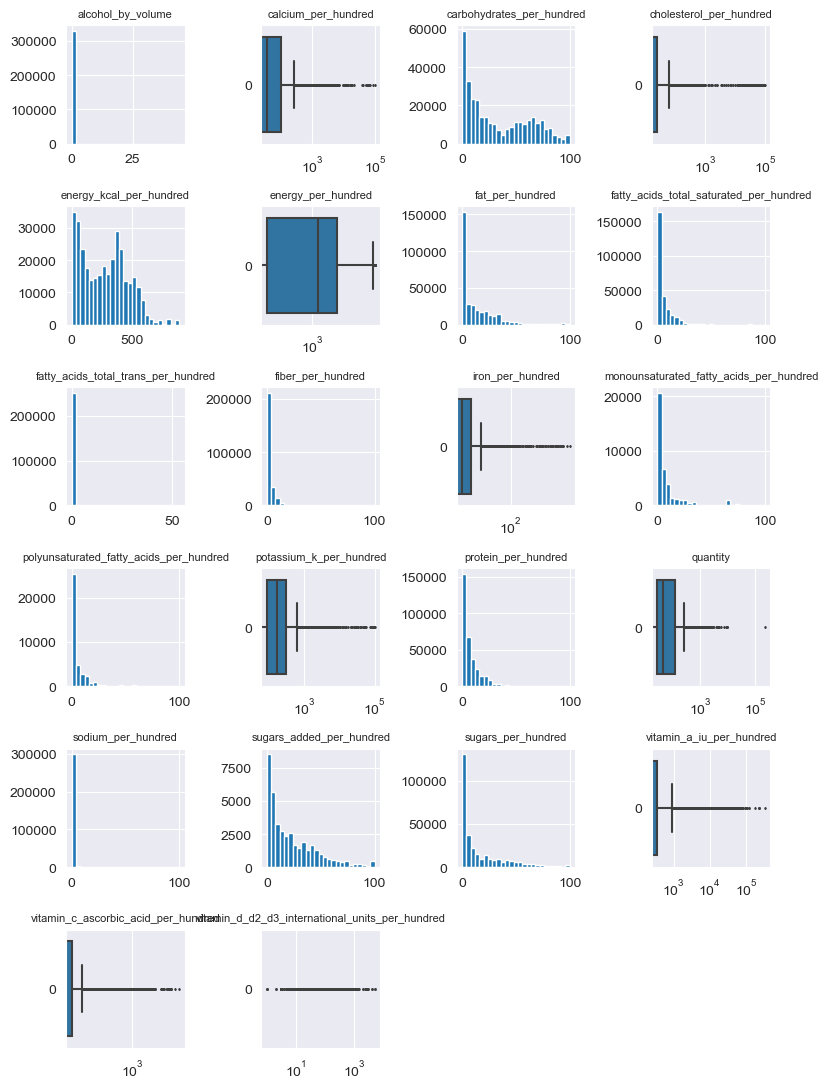

In [44]:
TOTAL_WIDTH = 4
BOXPLOT_THRESHOLD = 1000
num_plots = len(df_numeric.columns)
num_rows = math.ceil(num_plots / TOTAL_WIDTH)
figure_height = df_numeric.shape[1] / TOTAL_WIDTH * 2

fig, axes = plt.subplots(nrows=num_rows , ncols=TOTAL_WIDTH, figsize=(TOTAL_WIDTH * 2, figure_height))
axes = axes.flatten()

for i, column in enumerate(df_numeric.columns):
  
        # Use boxplots for columns with wide range of values as histograms won't represent data properly
        if df[column].max() > BOXPLOT_THRESHOLD:
            sns.boxplot(data=df[column], orient='h', ax=axes[i], fliersize=1)
            axes[i].set_xscale('log')
        else:
            axes[i].hist(df[column], bins=25)         
        
        # Set the title of the subplot, small labels for readability
        axes[i].set_title(label=column,fontdict={'fontsize': 8})

plt.tight_layout()

for ax in axes.flatten():
    if not ax.has_data():
        ax.remove()
plt.show()

The min and max exclusion has worked but there is definitely some outliers left in dataframe, vitamin_c_ shows it, or sodium_per_hundred

In [45]:
print('Dataset shape after cleaning:', df.shape,
      '\n kept', '{:.0%}'.format(df.shape[0] / initial_rows_count),'of rows and',
       '{:.0%}'.format(df.shape[1] / initial_columns_count),'of columns'
     )

Dataset shape after cleaning: (328728, 51) 
 kept 85% of rows and 52% of columns


# 7) Other inconsistencies in the data

We know from packaging example fiber, sodium, carbs, protein and fat are per hundred and are all in grams (from unit columns).
We also know there sum can't exceed 100 so we can 

In [46]:
nutritional_values = ['fiber_per_hundred',
                      'sodium_per_hundred',
                      'carbohydrates_per_hundred',
                      'fat_per_hundred',
                      'protein_per_hundred',                   
                     ]

# Calculate the sum of the values in the nutritional_values columns
unacceptable_values = df[nutritional_values].sum(axis=1) > 100
df = df[~unacceptable_values]

In [47]:
print('Dataset shape after cleaning:', df.shape,
      '\n kept', '{:.0%}'.format(df.shape[0] / initial_rows_count),'of rows and',
       '{:.0%}'.format(df.shape[1] / initial_columns_count),'of columns'
     )

Dataset shape after cleaning: (293335, 51) 
 kept 76% of rows and 52% of columns


# 8) Address outliers in per_hundred columns

As we have a lot of null values, which is normal for nutritional values (very possible for a product to have no fat or sugar for instance), we will only check outliers on right side of distribution.
we will test to methods
- zscore
- IQR
for representation, using both values seen in course, and checking how limitating they are

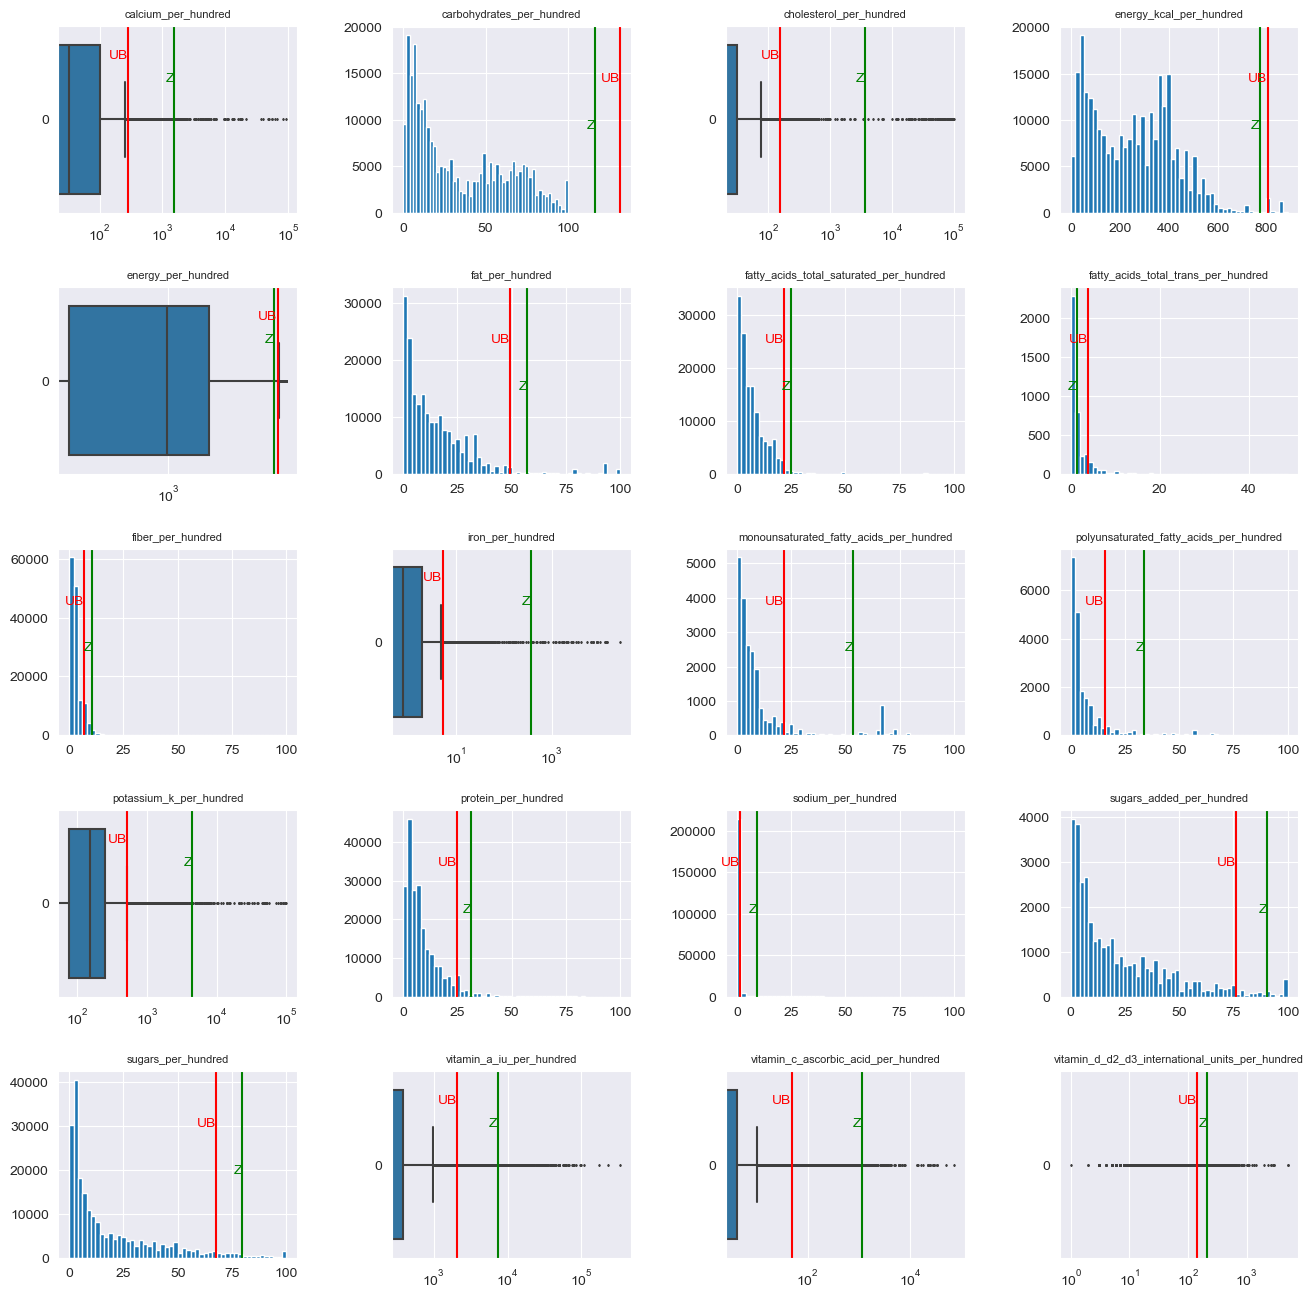

In [48]:
per_hundred_columns = [column for column in df.columns if column.endswith('_per_hundred')]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(16, 16))
axes = axes.flatten()

for i, column in enumerate(per_hundred_columns):
        # IQR calculation
        Q1 = df[column][df[column]>0].quantile(0.25)
        Q2 = df[column][df[column]>0].quantile(0.5)
        Q3 = df[column][df[column]>0].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper bound
        upper_bound = Q3 + 1.5 * IQR
        
        # Use boxplots for columns with wide range of values as histograms won't represent data properly
        if df[column].max() > 1000:
            sns.boxplot(data=df[column], orient='h', ax=axes[i], fliersize=1)
            axes[i].set_xscale('log')
        else:
            axes[i].hist(df[column][df[column]>0], bins=50)         

        # Use red for upperbound for IQR method
        axes[i].axvline(upper_bound, color='red')
        # use axes[i].get_ylim()[1] * 3/4 to set label in ratio of total subplot height
        axes[i].text(upper_bound, axes[i].get_ylim()[1] * 3/4 , 'UB', color='red', va='top', ha='right')

        # Use green for z score,
        z_score = df[column].mean() + 3 * df[column].std()
        axes[i].axvline(z_score, color='green')        
        axes[i].text(z_score, axes[i].get_ylim()[1] * 2/4, 'Z' , color='green', va='top', ha='right')

        # Set the title of the subplot, small labels for readability
        axes[i].set_title(label=column,fontdict={'fontsize': 8})

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

We can see Zscore is most likely better method as a starter since it is less restrictive and fits better to variables with a wide range of values.
We have one case for fatty_acid_total_trans though were it is not clear if Z is better. 
To be as conservative as possible as possible at this stage, we will take the maximum of zscore and upperbound from IQR to exclude outliers on the right side of the distribution.

Before we will look at actual products on foodrepo platform that match outliers. As we have been investigating only on right side of distribution, top outliers match largest values in series.

In [49]:
df['url'] = df['id'].apply(lambda x: 'https://www.foodrepo.org/en/products/' + str(x))
for column in per_hundred_columns:
    # Select the top 2 rows in the current column using the nlargest method
    top_2_df = df.nlargest(2, column)
    print(column,top_2_df.loc[:,['id','url']]) 
df.drop(['url'],axis=1,inplace=True)

calcium_per_hundred             id                                          url
213315  215098  https://www.foodrepo.org/en/products/215098
210368  212151  https://www.foodrepo.org/en/products/212151
carbohydrates_per_hundred        id                                        url
161  1168  https://www.foodrepo.org/en/products/1168
166  1173  https://www.foodrepo.org/en/products/1173
cholesterol_per_hundred             id                                          url
165285  167065  https://www.foodrepo.org/en/products/167065
74604    76371   https://www.foodrepo.org/en/products/76371
energy_kcal_per_hundred         id                                        url
3591  4590  https://www.foodrepo.org/en/products/4590
3580  4579  https://www.foodrepo.org/en/products/4579
energy_per_hundred         id                                        url
3580  4579  https://www.foodrepo.org/en/products/4579
3583  4582  https://www.foodrepo.org/en/products/4582
fat_per_hundred         id                  

On some food products some outliers are legitimate products. For instance on sugar, sugar is composed of 100% sugar :D. And on fat, oil is a good candidate for 100% fat.
On others, such as fibers, top outliers are error entries https://www.foodrepo.org/en/products/208684.
In both cases, atypical products like sugar or oil that will not be representative of average food product, or error entries, it is okay to remove those outliers. There could be a case made if we were to have to look at very fat products and their ratio of trans fat for instance, but this does not seem to be required

In [50]:
for column in per_hundred_columns:
        # IQR calculation
        Q1 = df[column][df[column]>0].quantile(0.25)
        Q2 = df[column][df[column]>0].quantile(0.5)
        Q3 = df[column][df[column]>0].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper bound
        upper_bound = Q3 + 1.5 * IQR
        
        # Z score
        z_score_right = df[column].mean() + 3 * df[column].std()
        
        
        outlier_separator = max(upper_bound, z_score_right) 
        is_outlier = df[column] > outlier_separator
        
        # Summary of number of outliers per feature
        print(is_outlier.sum(axis=0),
              column,
              sep='  '
             )
        # Use boolean filtering to remove outliers
        df = df[~is_outlier]

297  calcium_per_hundred
0  carbohydrates_per_hundred
112  cholesterol_per_hundred
1519  energy_kcal_per_hundred
1501  energy_per_hundred
4287  fat_per_hundred
4455  fatty_acids_total_saturated_per_hundred
397  fatty_acids_total_trans_per_hundred
3564  fiber_per_hundred
52  iron_per_hundred
632  monounsaturated_fatty_acids_per_hundred
805  polyunsaturated_fatty_acids_per_hundred
77  potassium_k_per_hundred
4369  protein_per_hundred
2978  sodium_per_hundred
555  sugars_added_per_hundred
4846  sugars_per_hundred
1501  vitamin_a_iu_per_hundred
140  vitamin_c_ascorbic_acid_per_hundred
686  vitamin_d_d2_d3_international_units_per_hundred


In [51]:
print('Dataset shape after cleaning:', df.shape,
      '\n kept', '{:.0%}'.format(df.shape[0] / initial_rows_count),'of rows and',
       '{:.0%}'.format(df.shape[1] / initial_columns_count),'of columns'
     )

Dataset shape after cleaning: (260562, 51) 
 kept 68% of rows and 52% of columns


Column with most outliers is sugars_per_hundred. We still retain 68% of rows after cleaning outliers.

MISCELLANEOUS

For some reason, i spend time trying to generalize the method used here https://learn.extensionschool.ch/learn/programs/applied-data-science-machine-learning-v3/subjects/cleaning-the-data-v4/units/detecting-and-filtering-outliers-v4 in 'Using the interquartile range to identify outlier candidates'.
Goal is to have as variables number of columns in grid of chart shown and also number of charts per variable. 

This was more as an exerise than strictly needed for this question.

In [52]:
# Define function based using list comprehension for readability
# Interesting references https://stackoverflow.com/questions/434287/how-to-iterate-over-a-list-in-chunks
def create_sublists(master_list, length):
    '''Enumerate the elements of master_list in sub_lists of same length'''
    # Use range(start, stop, step) to iterate by steps
    # Can produces last element of inferior length
    return [master_list[i:i+length] for i in range(0, len(master_list), length)]

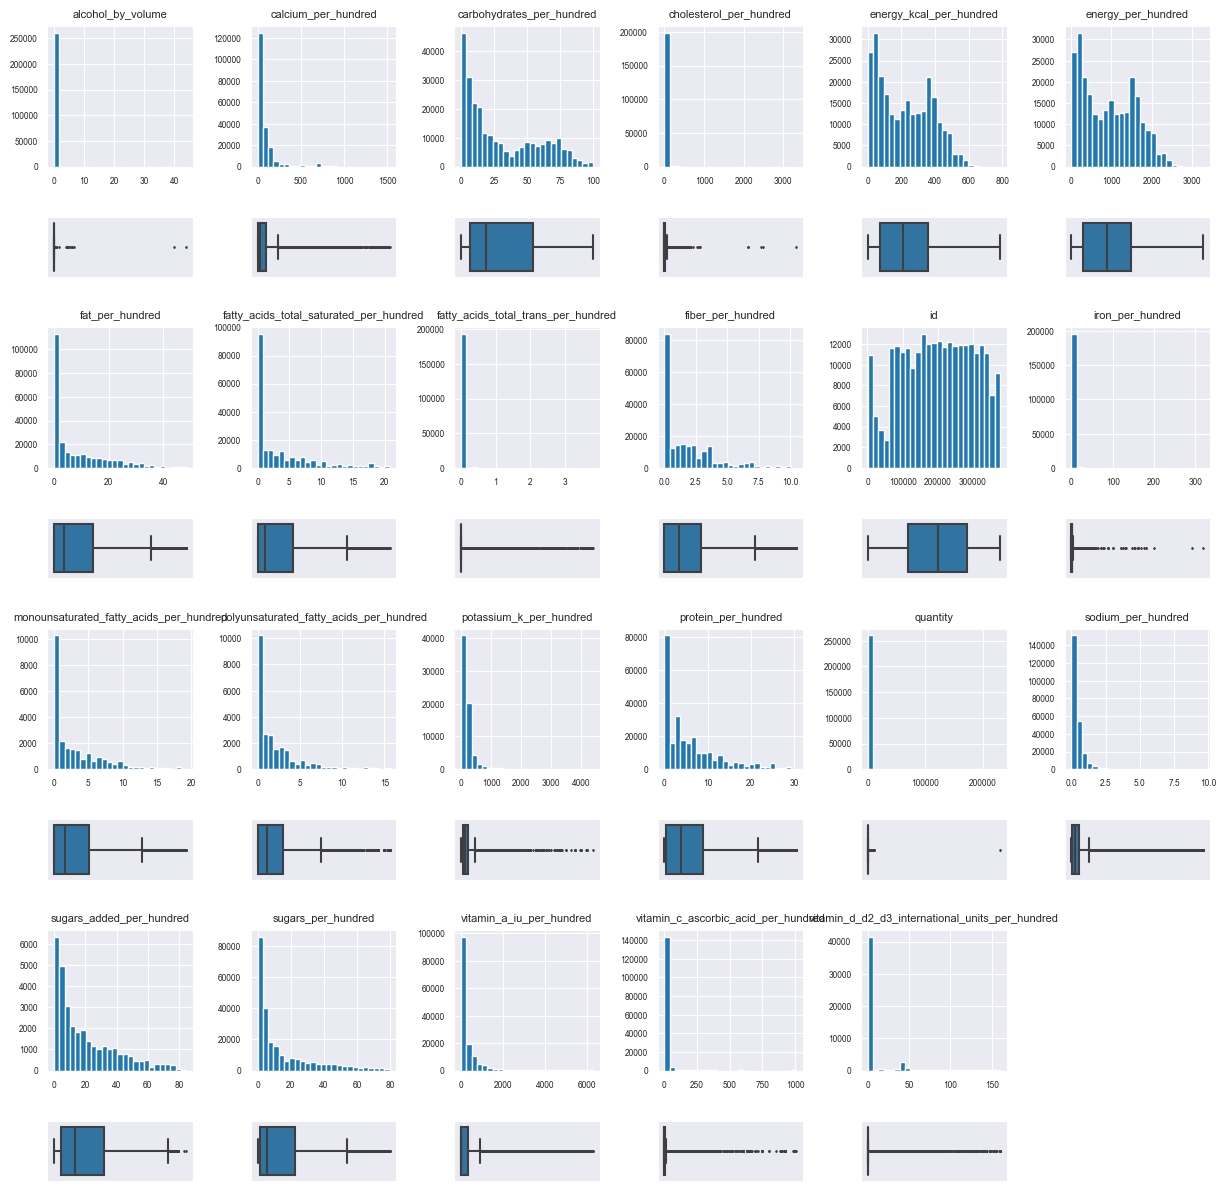

In [53]:
df_plot = df.select_dtypes(include='number')
TOTAL_WIDTH = 6
PLOT_VARIANTS = 2

# Calculate the number of rows needed to fit all the charts
total_height = df_plot.shape[1] // TOTAL_WIDTH

# Check if there are any extra columns that don't fit evenly into a full row
if df_plot.shape[1] % TOTAL_WIDTH != 0:
    # If there are extra columns, we need an additional row
    total_height += 1

# Multiply the number of rows by number of plot variants
total_height *= PLOT_VARIANTS

# If we have two plots variants, they need to be on rows 1 and 2 at first iteration, rows 2,3 at second
# example create_sublists(list(range(4)),2) produces [0,1] and [2,3]
vertical_positions = create_sublists(list(range(total_height)), PLOT_VARIANTS)

# This height_ratio is a tuple of number of elemnts equal to plot_variants
# it allocates size between each plot variant
height_ratio = (70, 30)
height_ratios = height_ratio * (total_height // PLOT_VARIANTS)

# Use subplots() to generate suitable figure shape and organisation
# manually modify wspace and hspace to rearrange subplots inner spacing
fig, axes = plt.subplots(
    total_height, TOTAL_WIDTH,
    gridspec_kw={'height_ratios': height_ratios, 'wspace' :0.4,'hspace':0.5},
    figsize=(15, 15)
)

splitted_columns = create_sublists(df_plot.columns, TOTAL_WIDTH)                                  

for i, columns in enumerate(splitted_columns):    
    for horizontal_position, column in enumerate(columns):        
        # First plot variant is a histogram
        vertical_position = vertical_positions[i][0]
        subplot = axes[vertical_position, horizontal_position] 
        subplot.hist(df[column], bins=25)
        subplot.set_title(label=column,fontdict={'fontsize': 8})
        subplot.tick_params(axis='both', which='major', labelsize=6)
        
        # Second plot variant is a boxplot
        vertical_position = vertical_positions[i][1]
        subplot = axes[vertical_position, horizontal_position] 
        sns.boxplot(data=df[column], orient='h', ax=subplot, fliersize=1)
        subplot.set(yticks=[], xticks=[])        
        
# Loop through the subplots and delete the ones without any data
for ax in axes.flatten():
    if not ax.has_data():
        ax.remove()

# Saving as cleaned dataframe
We chose to save dataframe to new file to start In-depth Exploratory Data Analysis

In [54]:
df.columns

Index(['alcohol_by_volume', 'barcode', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_unit',
       'cholesterol_per_hundred', 'cholesterol_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_unit', 'energy_per_hundred',
       'energy_unit', 'fat_per_hundred', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_per_hundred', 'fiber_unit', 'hundred_unit', 'id',
       'ingredients_en', 'iron_per_hundred', 'iron_unit',
       'monounsaturated_fatty_acids_per_hundred',
       'monounsaturated_fatty_acids_unit',
       'polyunsaturated_fatty_acids_per_hundred',
       'polyunsaturated_fatty_acids_unit', 'potassium_k_per_hundred',
       'potassium_k_unit', 'product_name_en', 'protein_per_hundred',
       'protein_unit', 'quantity', 'sodium_per_hundred', 'sodium_unit',
       's

In [55]:
# Using id column as new index
df.set_index(df['id'], inplace=True, verify_integrity=True)
# Saving to reuse in new notebook
df.to_pickle("./food_data_cleaned.pkl")